<a href="https://colab.research.google.com/github/Bksimon/Emory_MSBA/blob/main/DecisionTreeHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import os
import io
import numpy

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HW1_Data.csv to HW1_Data.csv


In [ ]:
# ISOM671 - HW1
# After Bus Understanding -> Data Understanding
hw1 = pd.read_csv(io.StringIO(uploaded['HW1_Data.csv'].decode('utf-8')))
print(hw1.head())
print(hw1.describe())

   revenue  outcalls  incalls  months  ...  pcown  creditcd  retcalls  churndep
0    83.53     20.00      1.0      31  ...      0         0         4         1
1    29.99      0.00      0.0      52  ...      1         1         3         1
2    37.75      2.67      0.0      25  ...      1         1         3         1
3     5.25      0.00      0.0      45  ...      0         0         2         1
4    42.71      8.67      0.0      27  ...      0         0         3         1

[5 rows x 12 columns]
            revenue      outcalls  ...      retcalls      churndep
count  31891.000000  31891.000000  ...  31891.000000  31891.000000
mean      58.665179     24.951385  ...      0.044088      0.497162
std       44.163859     34.790147  ...      0.224552      0.500000
min       -5.860000      0.000000  ...      0.000000      0.000000
25%       33.450000      3.000000  ...      0.000000      0.000000
50%       48.380000     13.330000  ...      0.000000      0.000000
75%       71.040000     33.3

In [ ]:
hw1 = hw1[hw1.eqpdays >= 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a14507450>]],
      dtype=object)

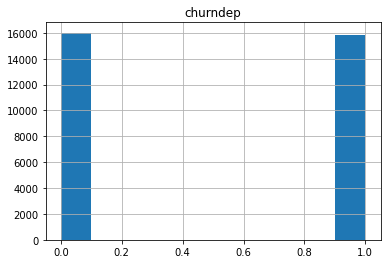

In [ ]:
hw1.hist(column='churndep')

churndep
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: revenue, dtype: object

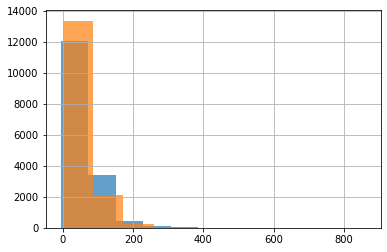

In [ ]:
# check features - revenue
hw1.groupby('churndep').revenue.hist(alpha=.7)

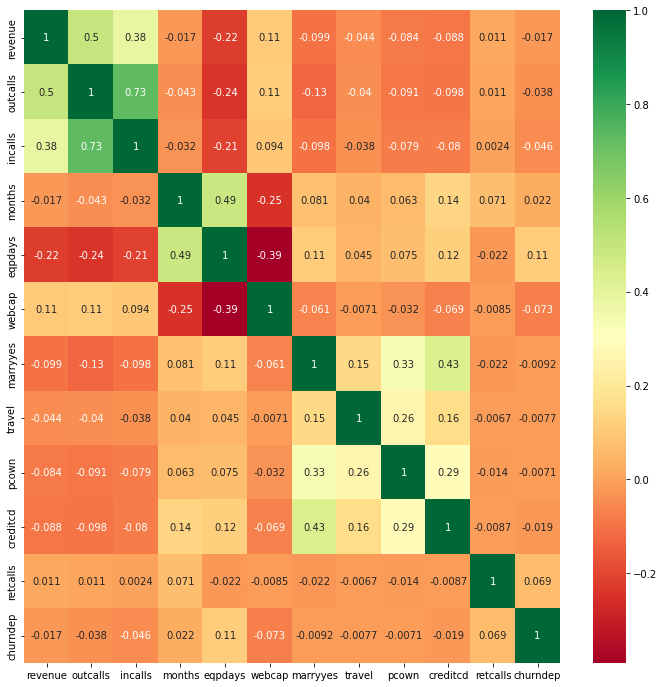

In [ ]:
corr_matrix = hw1.corr()
top_correlated_feats = corr_matrix.index
plt.figure(figsize=(12,12))

#plot heatmap
plot = sns.heatmap(hw1[top_correlated_feats].corr(), annot=True, cmap ="RdYlGn")

In [ ]:
## Modeling ## 
# Retrieving Attributes
X = hw1.iloc[:, 0:11]
#Retrieve target variable
y = hw1.iloc[:, 11]

# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [ ]:
# try different max_leaf_nodes paramter values:
for i in range(2,50,1):
  clf1 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, max_leaf_nodes=i)
  clf1 = clf1.fit(X_train, y_train)
  y_pred1 = clf1.predict(X_test)
  rate = accuracy_score(y_test, y_pred1)
  print("max leaf nodes:" + str(i) + "   accuracy:" + str(rate))

max leaf nodes:2   accuracy:0.5856185890726398
max leaf nodes:3   accuracy:0.5856185890726398
max leaf nodes:4   accuracy:0.5954574000418673
max leaf nodes:5   accuracy:0.5954574000418673
max leaf nodes:6   accuracy:0.5954574000418673
max leaf nodes:7   accuracy:0.5988067824994766
max leaf nodes:8   accuracy:0.5988067824994766
max leaf nodes:9   accuracy:0.5988067824994766
max leaf nodes:10   accuracy:0.5988067824994766
max leaf nodes:11   accuracy:0.5988067824994766
max leaf nodes:12   accuracy:0.5988067824994766
max leaf nodes:13   accuracy:0.5988067824994766
max leaf nodes:14   accuracy:0.5988067824994766
max leaf nodes:15   accuracy:0.5979694368850743
max leaf nodes:16   accuracy:0.599644128113879
max leaf nodes:17   accuracy:0.599644128113879
max leaf nodes:18   accuracy:0.599644128113879
max leaf nodes:19   accuracy:0.599644128113879
max leaf nodes:20   accuracy:0.599644128113879
max leaf nodes:21   accuracy:0.599644128113879
max leaf nodes:22   accuracy:0.599644128113879
max lea

In [ ]:
# tuning for min_impurity_decrease values:
for i in numpy.arange(0, .011, .001):
  clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_impurity_decrease=i)
  clf2 = clf2.fit(X_train, y_train)
  y_pred2 = clf2.predict(X_test)
  rate = accuracy_score(y_test, y_pred2)
  print(str(round(i, 4)) + " " + str(round(rate,6)))

0.0 0.533703
0.001 0.598807
0.002 0.595457
0.003 0.595457
0.004 0.595457
0.005 0.585619
0.006 0.585619
0.007 0.585619
0.008 0.585619
0.009 0.585619
0.01 0.585619


final decision tree accuracy: 0.5954574000418673


[Text(167.4, 190.26, 'X[4] <= 304.5\nentropy = 1.0\nsamples = 22291\nvalue = [11337, 10954]'),
 Text(83.7, 135.9, 'X[3] <= 10.5\nentropy = 0.964\nsamples = 9045\nvalue = [5533, 3512]'),
 Text(41.85, 81.53999999999999, 'entropy = 0.898\nsamples = 3804\nvalue = [2609, 1195]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 15.5\nentropy = 0.99\nsamples = 5241\nvalue = [2924, 2317]'),
 Text(83.7, 27.180000000000007, 'entropy = 0.987\nsamples = 1644\nvalue = [712, 932]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.962\nsamples = 3597\nvalue = [2212, 1385]'),
 Text(251.10000000000002, 135.9, 'X[3] <= 12.5\nentropy = 0.989\nsamples = 13246\nvalue = [5804, 7442]'),
 Text(209.25, 81.53999999999999, 'entropy = 0.943\nsamples = 2580\nvalue = [930, 1650]'),
 Text(292.95, 81.53999999999999, 'entropy = 0.995\nsamples = 10666\nvalue = [4874, 5792]')]

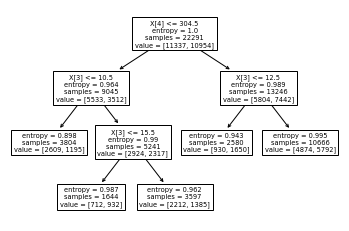

In [ ]:
# Build final Decision Tree
clf_final = DecisionTreeClassifier(criterion='entropy', splitter='best', max_leaf_nodes= 16, min_impurity_decrease=.002)
clf_final = clf_final.fit(X_train, y_train)
y_pred = clf_final.predict(X_test)
print("final decision tree accuracy: " + str(accuracy_score(y_test, y_pred)))
plot_tree(clf_final)

In [ ]:
# confusion matrix > accuracy
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Churn', 'Predicted Churn'],
    index = ['True Not Chrun', 'True Churn']
)

,Predicted Not Churn,Predicted Churn
True Not Chrun,1991,2679
True Churn,1186,3698
